## TELECOM CHURN PREDICTION

#### Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another.To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.Churn prediction is usually more critical for prepaid customers.We need to use the usage-based definition to define churn.

#### Business Objective:
To build a machine learning model that will predict if a customer will churn, given the ~170 columns containing customer behavior, usage patterns, payment patterns etc. Target variable is "churn_probability".

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
# Importing libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.decomposition import PCA

In [2]:
# To set max value of rows & cols 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

### STEP 1: Data Preparation

In [3]:
#importing dataset
telecom = pd.read_csv('train.csv')
telecom.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [4]:
#check info
telecom.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [5]:
#check shape
telecom.shape

(69999, 172)

In [6]:
#describe the data
telecom.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

In [7]:
# finding columns with max value
telecom.max()

id                          69998
circle_id                     109
loc_og_t2o_mou                0.0
std_og_t2o_mou                0.0
loc_ic_t2o_mou                0.0
last_date_of_month_6    6/30/2014
arpu_6                  27731.088
arpu_7                  35145.834
arpu_8                  33543.624
onnet_mou_6               7376.71
onnet_mou_7               8157.78
onnet_mou_8              10752.56
offnet_mou_6              8362.36
offnet_mou_7              7043.98
offnet_mou_8             14007.34
roam_ic_mou_6             2850.98
roam_ic_mou_7             4155.83
roam_ic_mou_8             4169.81
roam_og_mou_6             3775.11
roam_og_mou_7             2812.04
roam_og_mou_8             5337.04
loc_og_t2t_mou_6          6431.33
loc_og_t2t_mou_7          7400.66
loc_og_t2t_mou_8         10752.56
loc_og_t2m_mou_6          4696.83
loc_og_t2m_mou_7          4557.14
loc_og_t2m_mou_8          4961.33
loc_og_t2f_mou_6           617.58
loc_og_t2f_mou_7           815.33
loc_og_t2f_mou

In [8]:
# finding % of missing values
telecom.isnull().sum()/len(telecom)*100

id                           0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.002871
std_og_t2o_mou               1.002871
loc_ic_t2o_mou               1.002871
last_date_of_month_6         0.000000
last_date_of_month_7         0.570008
last_date_of_month_8         1.047158
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  3.954342
onnet_mou_7                  3.838626
onnet_mou_8                  5.290076
offnet_mou_6                 3.954342
offnet_mou_7                 3.838626
offnet_mou_8                 5.290076
roam_ic_mou_6                3.954342
roam_ic_mou_7                3.838626
roam_ic_mou_8                5.290076
roam_og_mou_6                3.954342
roam_og_mou_7                3.838626
roam_og_mou_8                5.290076
loc_og_t2t_mou_6             3.954342
loc_og_t2t_mou_7             3.838626
loc_og_t2t_mou_8             5.290076
loc_og_t2m_m

### STEP 2: Data Cleaning

In [9]:
#check dtypes
telecom.select_dtypes(include='object')

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/30/2014,7/31/2014,8/31/2014,6/22/2014,7/10/2014,8/24/2014,NaN,NaN,NaN
1,6/30/2014,7/31/2014,8/31/2014,6/12/2014,7/10/2014,8/26/2014,NaN,7/8/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,6/11/2014,7/22/2014,8/24/2014,NaN,NaN,NaN
3,6/30/2014,7/31/2014,8/31/2014,6/15/2014,7/21/2014,8/25/2014,NaN,NaN,NaN
4,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/26/2014,8/30/2014,6/25/2014,7/23/2014,8/20/2014
...,...,...,...,...,...,...,...,...,...
69994,6/30/2014,7/31/2014,8/31/2014,6/18/2014,7/31/2014,8/31/2014,NaN,7/31/2014,8/21/2014
69995,6/30/2014,7/31/2014,8/31/2014,6/28/2014,7/31/2014,8/27/2014,NaN,NaN,NaN
69996,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/30/2014,8/29/2014,NaN,NaN,NaN
69997,6/30/2014,7/31/2014,8/31/2014,6/29/2014,7/19/2014,8/26/2014,6/17/2014,7/13/2014,8/14/2014


In [10]:
#convert to integer from float
telecom['loc_og_t2o_mou'] = 0
telecom['std_og_t2o_mou'] = 0
telecom['loc_ic_t2o_mou'] = 0

In [11]:
#filling NA Values with 0
telecom=telecom.fillna(0)

In [12]:
# checking null
telecom.isnull().sum()/len(telecom)*100

id                          0.0
circle_id                   0.0
loc_og_t2o_mou              0.0
std_og_t2o_mou              0.0
loc_ic_t2o_mou              0.0
last_date_of_month_6        0.0
last_date_of_month_7        0.0
last_date_of_month_8        0.0
arpu_6                      0.0
arpu_7                      0.0
arpu_8                      0.0
onnet_mou_6                 0.0
onnet_mou_7                 0.0
onnet_mou_8                 0.0
offnet_mou_6                0.0
offnet_mou_7                0.0
offnet_mou_8                0.0
roam_ic_mou_6               0.0
roam_ic_mou_7               0.0
roam_ic_mou_8               0.0
roam_og_mou_6               0.0
roam_og_mou_7               0.0
roam_og_mou_8               0.0
loc_og_t2t_mou_6            0.0
loc_og_t2t_mou_7            0.0
loc_og_t2t_mou_8            0.0
loc_og_t2m_mou_6            0.0
loc_og_t2m_mou_7            0.0
loc_og_t2m_mou_8            0.0
loc_og_t2f_mou_6            0.0
loc_og_t2f_mou_7            0.0
loc_og_t

In [13]:
#Multiplying 'total_rech_data'and'av_rech_amt_data'
telecom['total_data_rech_amt_6']= telecom['total_rech_data_6'] * telecom['av_rech_amt_data_6']
telecom['total_data_rech_amt_7']= telecom['total_rech_data_7'] * telecom['av_rech_amt_data_7']
telecom['total_data_rech_amt_8']= telecom['total_rech_data_8'] * telecom['av_rech_amt_data_8']
telecom.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8
0,0,109,0,0,0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1958,0.0,0.0,0.0,0,0.0,0.0,0.0
1,1,109,0,0,0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,0,7/8/2

In [14]:
#adding 'total_data_rech_amt' and 'total_rech_amt'
telecom['total_rech_6'] = telecom['total_data_rech_amt_6'] + telecom['total_rech_amt_6']
telecom['total_rech_7'] = telecom['total_data_rech_amt_7'] + telecom['total_rech_amt_7']
telecom['total_rech_8'] = telecom['total_data_rech_amt_8'] + telecom['total_rech_amt_8']
telecom.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_rech_6,total_rech_7,total_rech_8
0,0,109,0,0,0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1958,0.0,0.0,0.0,0,0.0,0.0,0.0,77.0,65.0,10.0
1,1,109,0,0,0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,5

In [15]:
#average for june july
telecom['total_rech_6_7']= telecom['total_rech_6'] + telecom['total_rech_7']
round(telecom['total_rech_6_7'].mean(),2)

971.52

In [16]:
# 70th Percentile of average recharge amount for June + July
telecom['total_rech_6_7'].quantile(0.7)

955.0

In [17]:
#finding high value customers
len(telecom[(telecom['total_rech_6_7']>=telecom['total_rech_6_7'].quantile(0.7))])

21013

In [18]:
#storing them in new var
filter_telecom=telecom[(telecom['total_rech_6_7']>=telecom['total_rech_6_7'].quantile(0.7))]
filter_telecom.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_rech_6,total_rech_7,total_rech_8,total_rech_6_7
4,4,109,0,0,0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,0.0,0.0,15.73,0.0,0.0,10.16,4.83,6.13,36.74,19.88,4.61,11.99,1.23,5.01,0.0,9.85,0.00,58.91,25.94,15.76,0.0,0.0,0.0,4.35,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,4.35,0.00,0.00,0.0,0.0,0.0,0.00,17.00,0.00,0.0,0.0,0.0,63.26,42.94,15.76,5.44,1.39,2.66,10.58,4.33,19.49,5.51,3.63,6.14,21.54,9.36,28.31,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,21.54,9.36,28.31,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,13,10,8,290,136,122,50,41,30,6/25/2014,7/26/2014,8/30/2014,25,10,30,6/25/2014,7/23/2014,8/20/2014,7.0,7.0,6.0,25.0,41.0,25.0,7.0,6.0,6.0,0.0,1.0,0.0,175.0,191.0,142.0,390.80,308.89,213.47,0.0,0.00,0.00,0.00,35.00,0.00,0.00,35.12,0.00,0.0,0.0,0.0,0,0,0,7,6,6,0,0,0,0,1,0,1.0,1.0,1.0,647,0.0,0.00,0.00,0,1225.0,1337.0,852.0,1515.0,1473.0,974.0,2988.0
15,15,109,0,0,0,6/30/2014,7/31/2014,8/31/2014,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,0.00,0.0,0.0,0.00,0.0,0.0,10.43,24.99,194.43,313.76,330.88,185.88,3.26,10.91,4.94,0.0,0.00,0.00,327.46,366.79,385.26,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,6.26,0.0,0.0,0.0,0.00,0.00,6.26,0.0,0.0,0.0,0.08,0.00,0.00,0.1,0.0,0.0,327.64,366.79,391.53,13.86,20.18,335.43,219.31,754.24,285.63,0.00,1.93,8.88,233.18,776.36,629.94,0.0,0.0,0.0,0.00,0.00,0.00

In [19]:
#create new col churn
filter_telecom['Churn']=0

In [20]:
#calculating filter_telecom.Churn
filter_telecom['Churn'] = filter_telecom.index.isin(filter_telecom[(filter_telecom.total_og_mou_8 != 0) | (filter_telecom.total_ic_mou_8 != 0) | (filter_telecom.vol_2g_mb_8 != 0) | (filter_telecom.vol_3g_mb_8 != 0)].index)
filter_telecom.Churn=filter_telecom.Churn.apply(lambda x: 1 if x==False else 0)
filter_telecom.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_rech_6,total_rech_7,total_rech_8,total_rech_6_7,Churn
4,4,109,0,0,0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,0.0,0.0,15.73,0.0,0.0,10.16,4.83,6.13,36.74,19.88,4.61,11.99,1.23,5.01,0.0,9.85,0.00,58.91,25.94,15.76,0.0,0.0,0.0,4.35,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,4.35,0.00,0.00,0.0,0.0,0.0,0.00,17.00,0.00,0.0,0.0,0.0,63.26,42.94,15.76,5.44,1.39,2.66,10.58,4.33,19.49,5.51,3.63,6.14,21.54,9.36,28.31,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,21.54,9.36,28.31,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,13,10,8,290,136,122,50,41,30,6/25/2014,7/26/2014,8/30/2014,25,10,30,6/25/2014,7/23/2014,8/20/2014,7.0,7.0,6.0,25.0,41.0,25.0,7.0,6.0,6.0,0.0,1.0,0.0,175.0,191.0,142.0,390.80,308.89,213.47,0.0,0.00,0.00,0.00,35.00,0.00,0.00,35.12,0.00,0.0,0.0,0.0,0,0,0,7,6,6,0,0,0,0,1,0,1.0,1.0,1.0,647,0.0,0.00,0.00,0,1225.0,1337.0,852.0,1515.0,1473.0,974.0,2988.0,0
15,15,109,0,0,0,6/30/2014,7/31/2014,8/31/2014,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,0.00,0.0,0.0,0.00,0.0,0.0,10.43,24.99,194.43,313.76,330.88,185.88,3.26,10.91,4.94,0.0,0.00,0.00,327.46,366.79,385.26,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,6.26,0.0,0.0,0.0,0.00,0.00,6.26,0.0,0.0,0.0,0.08,0.00,0.00,0.1,0.0,0.0,327.64,366.79,391.53,13.86,20.18,335.43,219.31,754.24,285.63,0.00,1.93,8.88,233.18,776.36,629.94,0.0,0.0,0.0,0.00,0

In [21]:
#checking the churn
#churn 0:churn 1:not churn
filter_telecom[['id','total_ic_mou_8','total_og_mou_8','vol_2g_mb_8','vol_3g_mb_8','Churn']].head(20)

,id,total_ic_mou_8,total_og_mou_8,vol_2g_mb_8,vol_3g_mb_8,Churn
4,4,28.31,15.76,213.47,0.00,0
15,15,629.94,391.53,354.35,0.00,0
23,23,203.29,387.81,0.00,0.00,0
24,24,192.94,251.89,0.00,0.00,0
27,27,350.86,195.51,10.54,1342.93,0
33,33,0.00,2.68,0.00,74.29,0
39,39,310.29,1124.26,1476.89,0.00,0
45,45,379.78,1307.86,12.59,362.60,0
49,49,48.83,1148.54,0.00,0.00,0
52,52,193.99,898.54,0.00,0.00,0


In [22]:
# checking shape
filter_telecom.shape

(21013, 180)

In [23]:
#displaying churn 
#churn 0:churn 1:not churn
print(len(filter_telecom[filter_telecom.Churn==0]))
print(len(filter_telecom[filter_telecom.Churn==1]))

19893
1120


In [24]:
#dropping cols
filter_telecom = filter_telecom.drop(columns=['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8','std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'], axis=1)

In [25]:
#Drop unwanted columns
filter_telecom = filter_telecom.drop(columns=['fb_user_6','fb_user_7','fb_user_8','onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8'],axis=1)

In [26]:
#dropping unwanted cols
filter_telecom=filter_telecom.drop(columns=['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8'],axis=1)

In [27]:
#dropping unwanted cols
filter_telecom=filter_telecom.drop(columns=['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8'],axis=1)

In [28]:
#checking all cols
filter_telecom.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21013 entries, 4 to 69997
Data columns (total 150 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    last_date_of_month_6      object 
 3    last_date_of_month_7      object 
 4    last_date_of_month_8      object 
 5    arpu_6                    float64
 6    arpu_7                    float64
 7    arpu_8                    float64
 8    roam_ic_mou_6             float64
 9    roam_ic_mou_7             float64
 10   roam_ic_mou_8             float64
 11   roam_og_mou_6             float64
 12   roam_og_mou_7             float64
 13   roam_og_mou_8             float64
 14   loc_og_t2t_mou_6          float64
 15   loc_og_t2t_mou_7          float64
 16   loc_og_t2t_mou_8          float64
 17   loc_og_t2m_mou_6          float64
 18   loc_og_t2m_mou_7          float64
 19   loc_og_t2m_mou_8          float64
 20   loc_

### STEP 3: Scaling

In [29]:
#import standard scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [30]:
#checking max values
filter_telecom.max()

id                           69997
circle_id                      109
last_date_of_month_6     6/30/2014
arpu_6                   27731.088
arpu_7                   35145.834
arpu_8                   33543.624
roam_ic_mou_6              2613.31
roam_ic_mou_7              3813.29
roam_ic_mou_8              4169.81
roam_og_mou_6              3775.11
roam_og_mou_7              2812.04
roam_og_mou_8              5337.04
loc_og_t2t_mou_6           6431.33
loc_og_t2t_mou_7           7400.66
loc_og_t2t_mou_8          10752.56
loc_og_t2m_mou_6           4696.83
loc_og_t2m_mou_7           4557.14
loc_og_t2m_mou_8           4961.33
loc_og_t2f_mou_6            617.58
loc_og_t2f_mou_7            815.33
loc_og_t2f_mou_8            588.29
loc_og_t2c_mou_6            271.44
loc_og_t2c_mou_7            569.71
loc_og_t2c_mou_8            351.83
loc_og_mou_6              10643.38
loc_og_mou_7               7674.78
loc_og_mou_8              11039.91
std_og_t2t_mou_6           7366.58
std_og_t2t_mou_7    

In [31]:
#checking outliers
filter_telecom.describe(percentiles=[.25,.5,.90,.75,.95,.99])

,id,circle_id,arpu_6,arpu_7,arpu_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_rech_6,total_rech_7,total_rech_8,total_rech_6_7,Churn
count,21013.00000,21013.0,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.00000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000
mean,34994.28687,109.0,558.458938,558.729577,506.861525,16.084861,12.821732,12.074758,27.284505,20.322529,19.277298,84.016646,85.203732,7

In [32]:
#creating new cols
filter_telecom['roam_any_6'] = filter_telecom[['roam_ic_mou_6', 'roam_og_mou_6']].sum(axis = 1)
filter_telecom['roam_any_7'] = filter_telecom[['roam_ic_mou_7', 'roam_og_mou_7']].sum(axis = 1)
filter_telecom['roam_any_8'] = filter_telecom[['roam_ic_mou_8', 'roam_og_mou_8']].sum(axis = 1)
filter_telecom.head()

,id,circle_id,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_rech_6,total_rech_7,total_rech_8,total_rech_6_7,Churn,roam_any_6,roam_any_7,roam_any_8
4,4,109,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,101.565,53.64,0.0,0.0,15.73,0.0,0.0,10.16,4.83,6.13,36.74,19.88,4.61,11.99,1.23,5.01,0.0,9.85,0.00,58.91,25.94,15.76,0.0,0.0,0.0,4.35,0.00,0.00,0.0,0.0,0.00,4.35,0.00,0.00,0.0,0.0,0.0,0.00,17.00,0.00,0.0,0.0,0.0,63.26,42.94,15.76,5.44,1.39,2.66,10.58,4.33,19.49,5.51,3.63,6.14,21.54,9.36,28.31,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,21.54,9.36,28.31,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,50,41,30,6/25/2014,7/26/2014,8/30/2014,25,10,30,6/25/2014,7/23/2014,8/20/2014,7.0,7.0,6.0,25.0,41.0,25.0,175.0,191.0,142.0,390.80,308.89,213.47,0.0,0.00,0.00,0.00,35.00,0.00,0.00,35.12,0.00,0.0,0.0,0.0,0,0,0,7,6,6,0,0,0,0,1,0,647,0.0,0.00,0.00,0,1225.0,1337.0,852.0,1515.0,1473.0,974.0,2988.0,0,69.37,0.0,0.0
15,15,109,6/30/2014,7/31/2014,8/31/2014,580.549,377.294,338.286,0.00,0.0,0.0,0.00,0.0,0.0,10.43,24.99,194.43,313.76,330.88,185.88,3.26,10.91,4.94,0.0,0.00,0.00,327.46,366.79,385.26,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,6.26,0.00,0.00,6.26,0.0,0.0,0.0,0.08,0.00,0.00,0.1,0.0,0.0,327.64,366.79,391.53,13.86,20.18,335.43,219.31,754.24,285.63,0.00,1.93,8.88,233.18,776.36,629.94,0.0,0.0,0.0,0.00,0.00,0.00,0.00,1.03,0.0,0.00,1.03,0.00,233.18,777.39,629.94,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,250,250,250,6/27/2014,7/25/2014,8/30/2014,0,150,250,6/16/2014,0,8/2/2014,1.0,0.0,1.0,154.0,0.0,154.0,154.0,0.0,154.0,260.42,0.00,354.35,0.0,0.00,0.00,0.00,0.00,0.00,164.75,0.00,28.80,0.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,602,0.0,0.00,0.00,0,154.0,0.0,154.0,808.0,400.0,806.0,1208.0,0,0.00,0.0,0.0
23,23,109,6/30/2014,7/31/2014,8/31/2014,1130.948,905.506,479.762,0.00,0.0,0.0,0.00,0.0,0.0,859.53,372.71,0.89,79.79,424.63,378.01,11.58,25.43,8.88,0.0,0.00,0.00,950.91,822.78,387.79,0.0,0.

In [33]:
#applying lambda function to 0 & 1
filter_telecom['roam_any_6'] = filter_telecom['roam_any_6'].apply(lambda x: 1 if (x>0) else 0)
filter_telecom['roam_any_7'] = filter_telecom['roam_any_7'].apply(lambda x: 1 if (x>0) else 0)
filter_telecom['roam_any_8'] = filter_telecom['roam_any_8'].apply(lambda x: 1 if (x>0) else 0)
filter_telecom.head()

,id,circle_id,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_rech_6,total_rech_7,total_rech_8,total_rech_6_7,Churn,roam_any_6,roam_any_7,roam_any_8
4,4,109,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,101.565,53.64,0.0,0.0,15.73,0.0,0.0,10.16,4.83,6.13,36.74,19.88,4.61,11.99,1.23,5.01,0.0,9.85,0.00,58.91,25.94,15.76,0.0,0.0,0.0,4.35,0.00,0.00,0.0,0.0,0.00,4.35,0.00,0.00,0.0,0.0,0.0,0.00,17.00,0.00,0.0,0.0,0.0,63.26,42.94,15.76,5.44,1.39,2.66,10.58,4.33,19.49,5.51,3.63,6.14,21.54,9.36,28.31,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,21.54,9.36,28.31,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,50,41,30,6/25/2014,7/26/2014,8/30/2014,25,10,30,6/25/2014,7/23/2014,8/20/2014,7.0,7.0,6.0,25.0,41.0,25.0,175.0,191.0,142.0,390.80,308.89,213.47,0.0,0.00,0.00,0.00,35.00,0.00,0.00,35.12,0.00,0.0,0.0,0.0,0,0,0,7,6,6,0,0,0,0,1,0,647,0.0,0.00,0.00,0,1225.0,1337.0,852.0,1515.0,1473.0,974.0,2988.0,0,1,0,0
15,15,109,6/30/2014,7/31/2014,8/31/2014,580.549,377.294,338.286,0.00,0.0,0.0,0.00,0.0,0.0,10.43,24.99,194.43,313.76,330.88,185.88,3.26,10.91,4.94,0.0,0.00,0.00,327.46,366.79,385.26,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,6.26,0.00,0.00,6.26,0.0,0.0,0.0,0.08,0.00,0.00,0.1,0.0,0.0,327.64,366.79,391.53,13.86,20.18,335.43,219.31,754.24,285.63,0.00,1.93,8.88,233.18,776.36,629.94,0.0,0.0,0.0,0.00,0.00,0.00,0.00,1.03,0.0,0.00,1.03,0.00,233.18,777.39,629.94,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,250,250,250,6/27/2014,7/25/2014,8/30/2014,0,150,250,6/16/2014,0,8/2/2014,1.0,0.0,1.0,154.0,0.0,154.0,154.0,0.0,154.0,260.42,0.00,354.35,0.0,0.00,0.00,0.00,0.00,0.00,164.75,0.00,28.80,0.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,602,0.0,0.00,0.00,0,154.0,0.0,154.0,808.0,400.0,806.0,1208.0,0,0,0,0
23,23,109,6/30/2014,7/31/2014,8/31/2014,1130.948,905.506,479.762,0.00,0.0,0.0,0.00,0.0,0.0,859.53,372.71,0.89,79.79,424.63,378.01,11.58,25.43,8.88,0.0,0.00,0.00,950.91,822.78,387.79,0.0,0.0,0.0,202.08,0.

In [34]:
#dropping cols
filter_telecom = filter_telecom.drop(columns=['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8'])

In [35]:
#creating new cols
#applying filter
filter_telecom['local_any_6'] = filter_telecom[['loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6']].sum(axis=1)
filter_telecom['local_any_7'] = filter_telecom[['loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7']].sum(axis=1)
filter_telecom['local_any_8'] = filter_telecom[['loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8']].sum(axis=1)

filter_telecom['local_any_6'] = filter_telecom['local_any_6'].apply(lambda x: 1 if (x > 0) else 0)
filter_telecom['local_any_7'] = filter_telecom['local_any_7'].apply(lambda x: 1 if (x > 0) else 0)
filter_telecom['local_any_8'] = filter_telecom['local_any_8'].apply(lambda x: 1 if (x > 0) else 0)


In [36]:
#dropping cols
filter_telecom = filter_telecom.drop(columns=['loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8'])

In [37]:
#creating new cols
#applying lambda function to 0 & 1
filter_telecom['std_any_6'] = filter_telecom[['std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6']].sum(axis=1)
filter_telecom['std_any_7'] = filter_telecom[['std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'std_ic_mou_7']].sum(axis=1)
filter_telecom['std_any_8'] = filter_telecom[['std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8']].sum(axis=1)

filter_telecom['std_any_6'] = filter_telecom['std_any_6'].apply(lambda x: 1 if (x > 0) else 0)
filter_telecom['std_any_7'] = filter_telecom['std_any_7'].apply(lambda x: 1 if (x > 0) else 0)
filter_telecom['std_any_8'] = filter_telecom['std_any_8'].apply(lambda x: 1 if (x > 0) else 0)

In [38]:
#dropping cols
filter_telecom=filter_telecom.drop(columns=['std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8'])

In [39]:
#creating new cols
#applying lambda function to 0 & 1
filter_telecom['spl_any_6'] = filter_telecom[['isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6']].sum(axis=1)
filter_telecom['spl_any_7'] = filter_telecom[['isd_og_mou_7', 'spl_og_mou_7', 'og_others_7', 'spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7']].sum(axis=1)
filter_telecom['spl_any_8'] = filter_telecom[['isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8']].sum(axis=1)

filter_telecom['spl_any_6'] = filter_telecom['spl_any_6'].apply(lambda x: 1 if (x > 0) else 0)
filter_telecom['spl_any_7'] = filter_telecom['std_any_7'].apply(lambda x: 1 if (x > 0) else 0)
filter_telecom['spl_any_8'] = filter_telecom['std_any_8'].apply(lambda x: 1 if (x > 0) else 0)

In [40]:
#dropping cols
filter_telecom=filter_telecom.drop(columns=['isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8',  'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8'])

In [41]:
# DATA used in 2g 3g
filter_telecom['data_used_6'] = filter_telecom[['vol_2g_mb_6', 'vol_3g_mb_6', 'jun_vbc_3g']].sum(axis=1)
filter_telecom['data_used_7'] = filter_telecom[['vol_2g_mb_7', 'vol_3g_mb_7', 'jul_vbc_3g']].sum(axis=1)
filter_telecom['data_used_8'] = filter_telecom[['vol_2g_mb_8', 'vol_3g_mb_8', 'aug_vbc_3g']].sum(axis=1)

In [42]:
#dropping cols
filter_telecom=filter_telecom.drop(columns=['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g'])

In [43]:
#dropping cols
filter_telecom=filter_telecom.drop(columns=['max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8'])

In [44]:
#dropping cols
filter_telecom = filter_telecom.drop(columns=['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'total_data_rech_amt_6', 'total_data_rech_amt_7', 'total_data_rech_amt_8'])

In [45]:
#checking the cols
filter_telecom.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21013 entries, 4 to 69997
Data columns (total 66 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        21013 non-null  int64  
 1   circle_id                 21013 non-null  int64  
 2   last_date_of_month_6      21013 non-null  object 
 3   last_date_of_month_7      21013 non-null  object 
 4   last_date_of_month_8      21013 non-null  object 
 5   arpu_6                    21013 non-null  float64
 6   arpu_7                    21013 non-null  float64
 7   arpu_8                    21013 non-null  float64
 8   total_og_mou_6            21013 non-null  float64
 9   total_og_mou_7            21013 non-null  float64
 10  total_og_mou_8            21013 non-null  float64
 11  total_ic_mou_6            21013 non-null  float64
 12  total_ic_mou_7            21013 non-null  float64
 13  total_ic_mou_8            21013 non-null  float64
 14  date_o

### STEP 4: Data Visualization

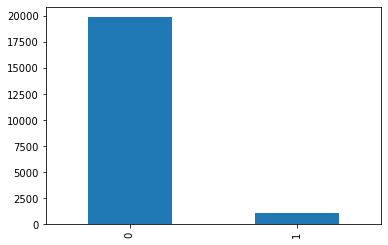

In [46]:
# plotting bar for CHURN
filter_telecom['Churn'].value_counts().plot.bar()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

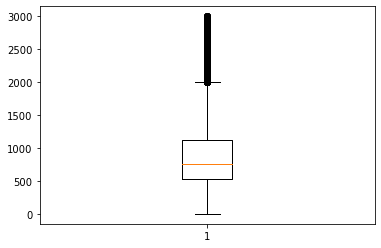

In [47]:
#plotting boxplot for TOTAL_RECH
filter_telecom1=filter_telecom[filter_telecom.total_rech_6<=3000]
plt.boxplot(filter_telecom1.total_rech_6)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

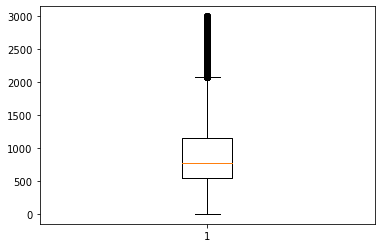

In [48]:
#plotting boxplot for TOTAL_RECH
filter_telecom1=filter_telecom[filter_telecom.total_rech_7<=3000]
plt.boxplot(filter_telecom1.total_rech_7)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

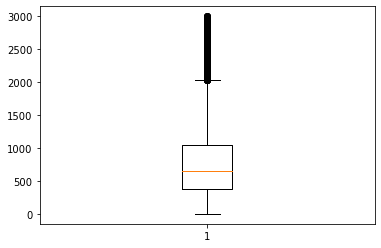

In [49]:
#plotting boxplot for TOTAL_RECH
filter_telecom1=filter_telecom[filter_telecom.total_rech_8<=3000]
plt.boxplot(filter_telecom1.total_rech_8)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

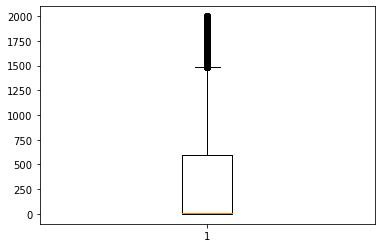

In [50]:
#plotting boxplot for DATA_USED
filter_telecom1=filter_telecom[filter_telecom.data_used_6<=2000]
plt.boxplot(filter_telecom1.data_used_6)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

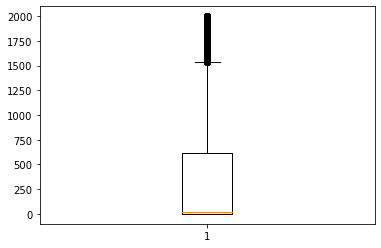

In [51]:
#plotting boxplot for DATA_USED
filter_telecom1=filter_telecom[filter_telecom.data_used_7<=2000]
plt.boxplot(filter_telecom1.data_used_7)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

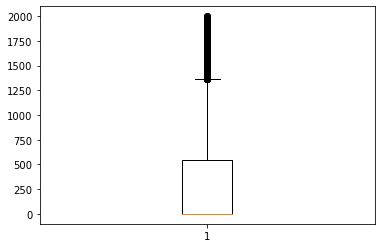

In [52]:
#plotting boxplot for DATA_USED
filter_telecom1=filter_telecom[filter_telecom.data_used_8<=2000]
plt.boxplot(filter_telecom1.data_used_8)
plt.show

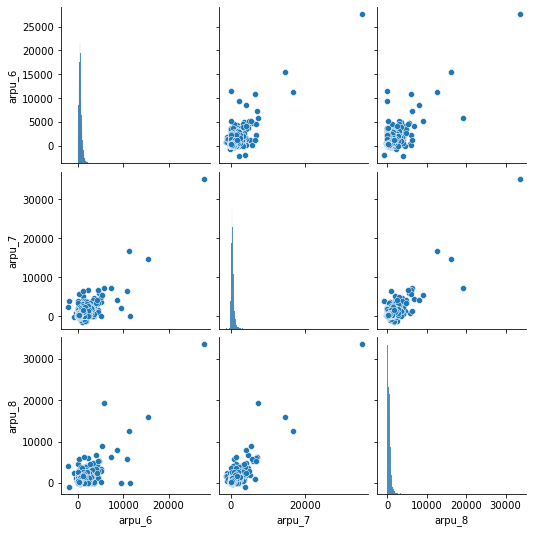

In [53]:
#plotting pair plots for ARPU
sns.pairplot(data=filter_telecom[['arpu_6','arpu_7','arpu_8']])

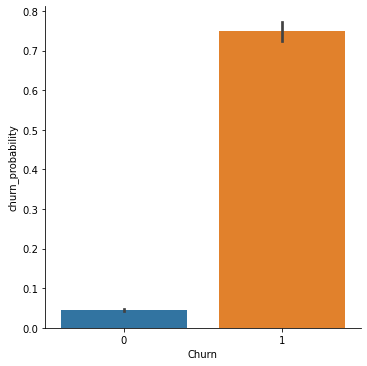

In [54]:
#plotting catplot for CHURN & CHURN PROBABILITY
sns.catplot(x='Churn',y='churn_probability',kind='bar',data=filter_telecom)

<AxesSubplot:>

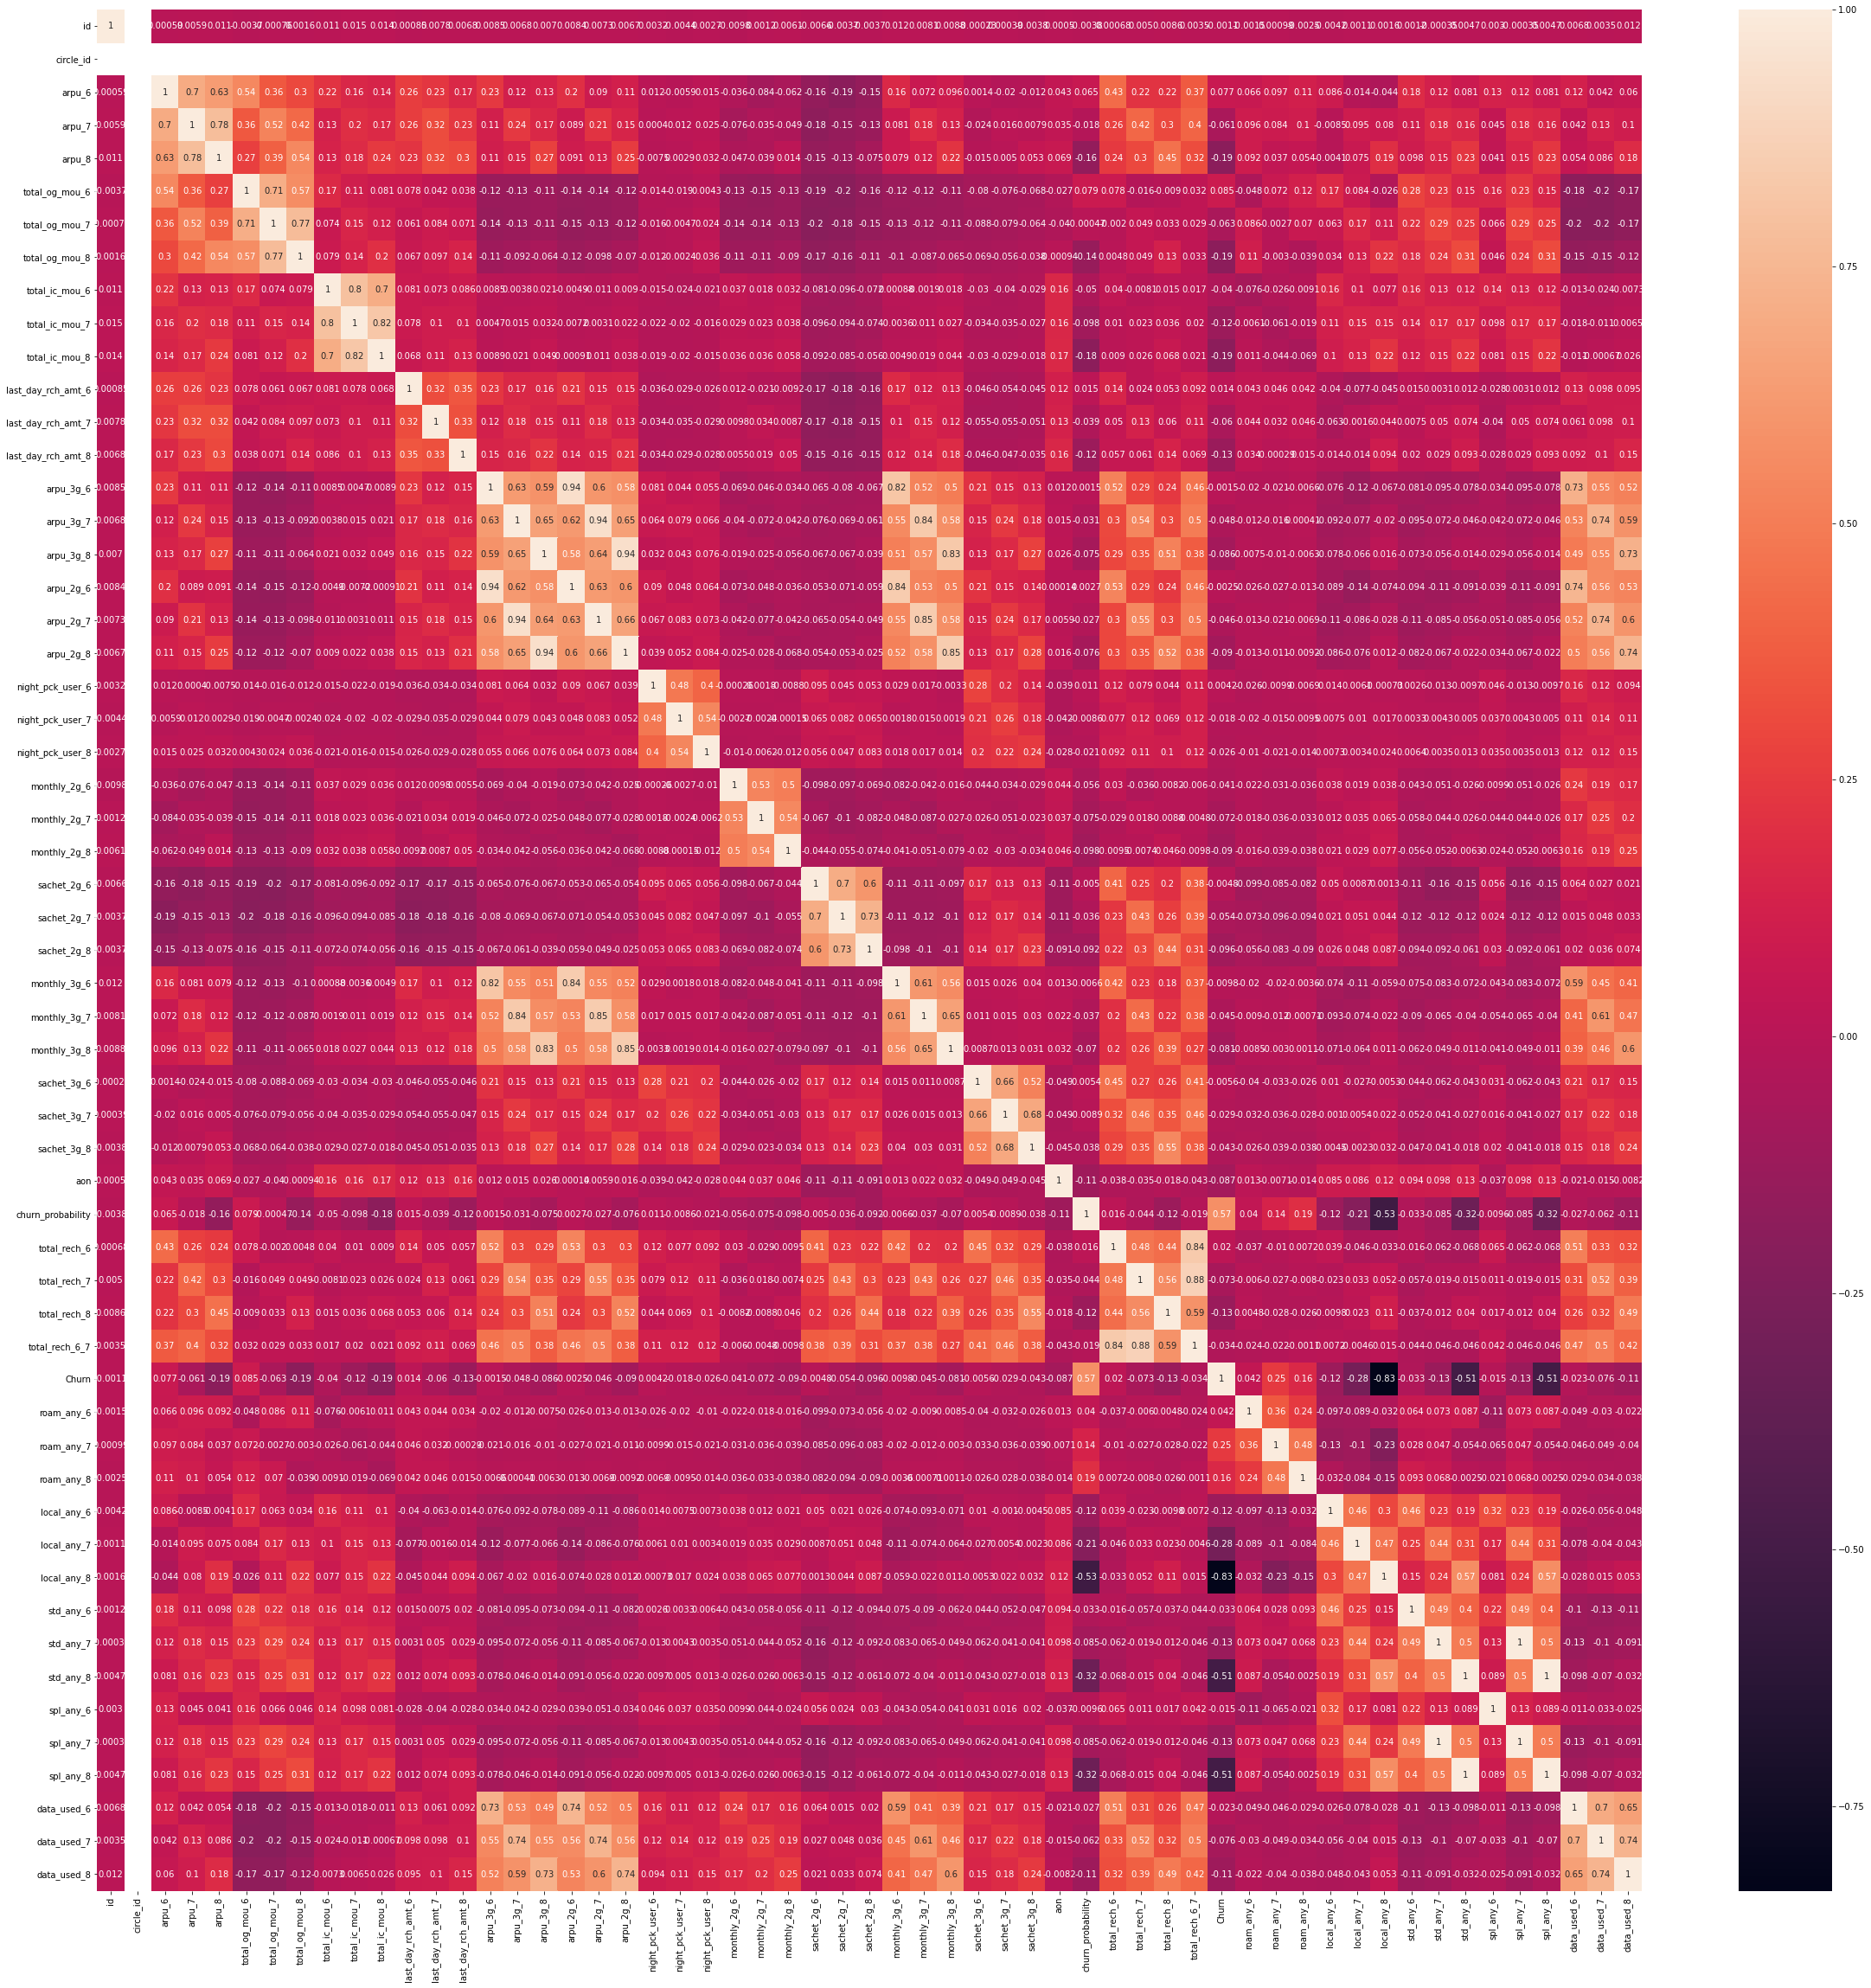

In [55]:
#plotting HEATMAP
plt.figure(figsize=(40,40))
sns.heatmap(filter_telecom.corr(),annot=True)

### STEP 5: Train-test split

In [56]:
#creating X & Y
X = filter_telecom[['last_day_rch_amt_6','arpu_6', 'arpu_7', 'arpu_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8','last_day_rch_amt_7', 'last_day_rch_amt_8','arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon','total_rech_6', 'total_rech_7', 'total_rech_8','total_rech_6_7','roam_any_6','roam_any_7','roam_any_8','local_any_6','local_any_7','local_any_8','std_any_6','std_any_7','std_any_8','spl_any_6','spl_any_7','spl_any_8','data_used_6','data_used_7','data_used_8']]

In [57]:
X.shape

(21013, 53)

In [58]:
y=filter_telecom.Churn

In [59]:
# splitting the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

In [60]:
# storing numeric data 
X_train[['arpu_6', 'arpu_7', 'arpu_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon', 'total_rech_6', 'total_rech_7', 'total_rech_8', 'roam_any_6', 'roam_any_7', 'roam_any_8', 'local_any_6', 'local_any_7', 'local_any_8', 'std_any_6', 'std_any_7', 'std_any_8', 'spl_any_6', 'spl_any_7', 'spl_any_8', 'data_used_6', 'data_used_7', 'data_used_8']] = scaler.fit_transform(X_train[['arpu_6', 'arpu_7', 'arpu_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon', 'total_rech_6', 'total_rech_7', 'total_rech_8', 'roam_any_6', 'roam_any_7', 'roam_any_8', 'local_any_6', 'local_any_7', 'local_any_8', 'std_any_6', 'std_any_7', 'std_any_8', 'spl_any_6', 'spl_any_7', 'spl_any_8', 'data_used_6', 'data_used_7', 'data_used_8']])
X_test[['arpu_6', 'arpu_7', 'arpu_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon', 'total_rech_6', 'total_rech_7', 'total_rech_8', 'roam_any_6', 'roam_any_7', 'roam_any_8', 'local_any_6', 'local_any_7', 'local_any_8', 'std_any_6', 'std_any_7', 'std_any_8', 'spl_any_6', 'spl_any_7', 'spl_any_8', 'data_used_6', 'data_used_7', 'data_used_8']] = scaler.transform(X_test[['arpu_6', 'arpu_7', 'arpu_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon', 'total_rech_6', 'total_rech_7', 'total_rech_8', 'roam_any_6', 'roam_any_7', 'roam_any_8', 'local_any_6', 'local_any_7', 'local_any_8', 'std_any_6', 'std_any_7', 'std_any_8', 'spl_any_6', 'spl_any_7', 'spl_any_8', 'data_used_6', 'data_used_7', 'data_used_8']])

In [61]:
X_train.shape

(14709, 53)

In [62]:
X_test.shape

(6304, 53)

### STEP 6: PCA 

In [63]:
#import PCA
from sklearn.decomposition import PCA
pca=PCA(random_state=42,svd_solver='randomized')

In [64]:
#PCA on train data
pca.fit(X_train)
pca.components_

array([[ 2.23663869e-05,  1.22997775e-04,  1.35531652e-04, ...,
         1.81758975e-04,  1.94235058e-04,  1.58337716e-04],
       [ 8.12665581e-02, -3.38206536e-02, -3.56430481e-02, ...,
         2.19767131e-01,  2.35189882e-01,  2.42788308e-01],
       [ 1.17524981e-01,  2.25403051e-01,  2.63177064e-01, ...,
         4.15945387e-04,  1.94111092e-02,  4.02929859e-02],
       ...,
       [ 0.00000000e+00, -8.40897388e-17, -4.26728694e-17, ...,
        -5.49729501e-17, -8.45045132e-18, -1.28189029e-17],
       [-0.00000000e+00, -6.83685856e-17, -9.47630701e-18, ...,
         6.17909543e-18, -7.31904013e-18, -2.62838177e-18],
       [ 0.00000000e+00, -4.19361085e-15,  1.66753846e-14, ...,
        -7.03181074e-15,  2.29464687e-14,  5.36080180e-16]])

In [65]:
#verifying pca
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head(20)

,PC1,PC2,Feature
0,0.000022,0.081267,last_day_rch_amt_6
1,0.000123,-0.033821,arpu_6
2,0.000136,-0.035643,arpu_7
3,0.000101,-0.013812,arpu_8
4,0.000009,-0.141742,total_og_mou_6
5,0.000008,-0.150755,total_og_mou_7
6,0.000008,-0.128427,total_og_mou_8
7,0.000007,-0.035592,total_ic_mou_6
8,0.000008,-0.039864,total_ic_mou_7
9,0.000008,-0.034455,total_ic_mou_8


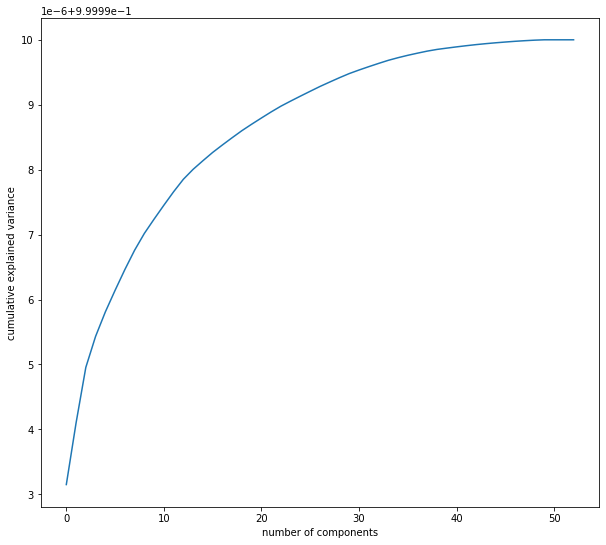

In [66]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (10,9))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [67]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(n_components=15, random_state=42)

In [68]:
#fit train data
X_train_pca = pca.fit_transform(X_train)
X_train_pca.shape

(14709, 15)

<AxesSubplot:>

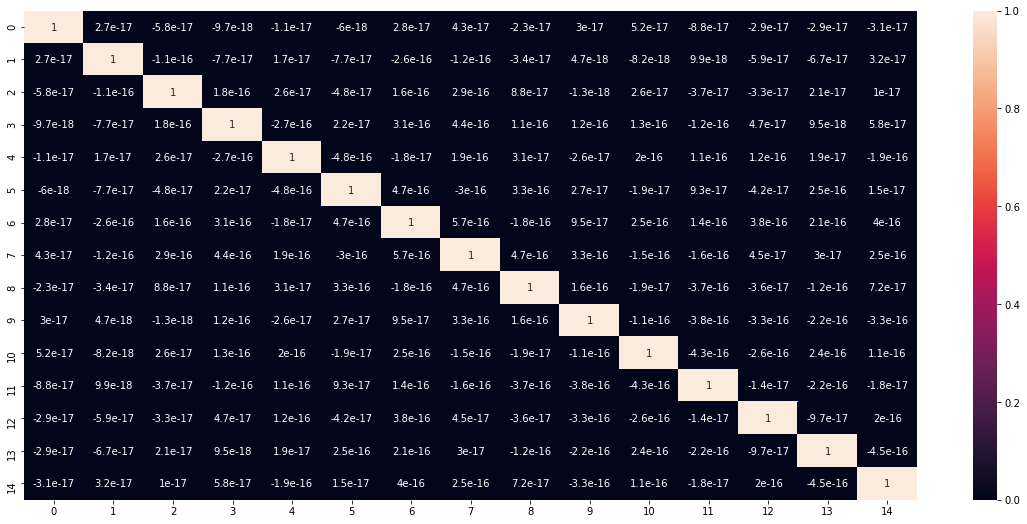

In [69]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,9))
sns.heatmap(np.corrcoef(X_train_pca.transpose()), annot=True)

In [70]:
#training the regression model
logsk = LogisticRegression(random_state=42)
model = logsk.fit(X_train_pca,y_train)

In [71]:
round(model.score(X_train_pca,y_train)*100,2)

99.27

In [72]:
#PCA on test data
X_test_pca = pca.transform(X_test)
X_test_pca.shape

(6304, 15)

In [73]:
# Predicted probabilities
y_pred = logsk.predict_proba(X_train_pca)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_df = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_df.head()

,1
0,0.000031
1,0.000002
2,0.000001
3,0.000026
4,0.992490


In [74]:
#y train to df
y_train_df=pd.DataFrame(y_train)
y_train_df.head()

,Churn
28540,0
68951,0
57620,0
63651,0
8581,1


In [75]:
# Putting index
y_train_df['I'] = y_train_df.index
# Removing index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_train_df.reset_index(drop=True, inplace=True)
# Appending y_train_df and y_pred_df
y_pred_final = pd.concat([y_train_df,y_pred_df], axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['I', 'Churn', 'Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

,I,Churn,Churn_Prob
0,28540,0,0.000031
1,68951,0,0.000002
2,57620,0,0.000001
3,63651,0,0.000026
4,8581,1,0.992490


In [76]:
# Creating new column 'Predicted' with 1 if Converted_Prob > 0.5 else 0
y_pred_final['Predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

,I,Churn,Churn_Prob,Predicted
0,28540,0,0.000031,0
1,68951,0,0.000002,0
2,57620,0,0.000001,0
3,63651,0,0.000026,0
4,8581,1,0.992490,1


In [77]:
for i in range(10):
    y_pred_final[i/10]= y_pred_final.Churn_Prob.map(lambda x: 1 if (x > (i/10)) else 0)
y_pred_final.head()

,I,Churn,Churn_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,28540,0,0.000031,0,1,0,0,0,0,0,0,0,0,0
1,68951,0,0.000002,0,1,0,0,0,0,0,0,0,0,0
2,57620,0,0.000001,0,1,0,0,0,0,0,0,0,0,0
3,63651,0,0.000026,0,1,0,0,0,0,0,0,0,0,0
4,8581,1,0.992490,1,1,1,1,1,1,1,1,1,1,1


In [78]:
from sklearn import metrics

#confusion matrix
confusion=metrics.confusion_matrix(y_pred_final.Churn,y_pred_final.Predicted)
confusion

array([[13848,    74],
       [   33,   754]], dtype=int64)

In [79]:
round(metrics.accuracy_score(y_pred_final.Churn,y_pred_final.Predicted),4)*100

99.27

In [80]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [81]:
#checking sensitivity
round(TP / float(TP+FN), 4) * 100

95.81

In [82]:
#calculate specificity
round(TN / float(TN+FP), 4) * 100

99.47

In [83]:
#calculate false positive
round(FP/ float(TN+FP), 4) * 100

0.53

In [84]:
#positive predictive value
round(TP / float(TP+FP), 4)* 100

91.06

In [85]:
# Negative predictive value
round(TN / float(TN+ FN), 4) * 100

99.76

In [86]:
#creating function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

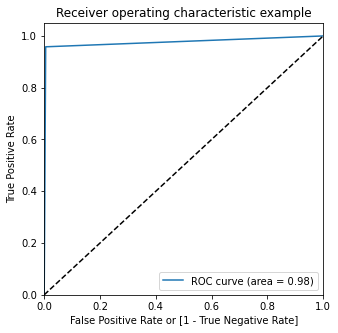

In [87]:
#plotting
draw_roc(y_pred_final.Churn, y_pred_final.Predicted)

In [88]:
# create cut off matrix based on different values we have calculated
from sklearn.metrics import precision_score, recall_score

cutoffmatrix_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity','Precision','Recall'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final[i] )
    total1=sum(sum(cm))
    Accuracy = (cm[0,0] + cm[1,1]) / total1
    
    Specificity = cm[0,0] / (cm[0,0] + cm[0,1])
    Sensitivity = cm[1,1] / (cm[1,0] + cm[1,1])
    Precision = precision_score(y_pred_final.Churn, y_pred_final[i])
    Recall = recall_score(y_pred_final.Churn, y_pred_final[i])
    cutoffmatrix_df.loc[i] =[i, Accuracy, Sensitivity, Specificity, Precision, Recall]

cutoffmatrix_df

,Probability,Accuracy,Sensitivity,Specificity,Precision,Recall
0.0,0.0,0.053505,1.000000,0.000000,0.053505,1.000000
0.1,0.1,0.987559,0.984752,0.987717,0.819239,0.984752
0.2,0.2,0.990550,0.978399,0.991237,0.863229,0.978399
0.3,0.3,0.992114,0.974587,0.993104,0.888760,0.974587
0.4,0.4,0.992590,0.969504,0.993895,0.899764,0.969504
0.5,0.5,0.992726,0.958069,0.994685,0.910628,0.958069
0.6,0.6,0.992454,0.942821,0.995259,0.918317,0.942821
0.7,0.7,0.992250,0.921220,0.996265,0.933076,0.921220
0.8,0.8,0.990346,0.874206,0.996911,0.941176,0.874206
0.9,0.9,0.985043,0.749682,0.998348,0.962480,0.749682


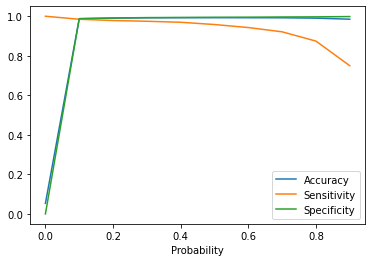

In [89]:
# plot accuracy sensitivity and specificity for various probabilities.
cutoffmatrix_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

In [90]:
# 0.10 is optimal value
y_pred_final['Predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.1 else 0)
y_pred_final.head()

,I,Churn,Churn_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,28540,0,0.000031,0,1,0,0,0,0,0,0,0,0,0
1,68951,0,0.000002,0,1,0,0,0,0,0,0,0,0,0
2,57620,0,0.000001,0,1,0,0,0,0,0,0,0,0,0
3,63651,0,0.000026,0,1,0,0,0,0,0,0,0,0,0
4,8581,1,0.992490,1,1,1,1,1,1,1,1,1,1,1


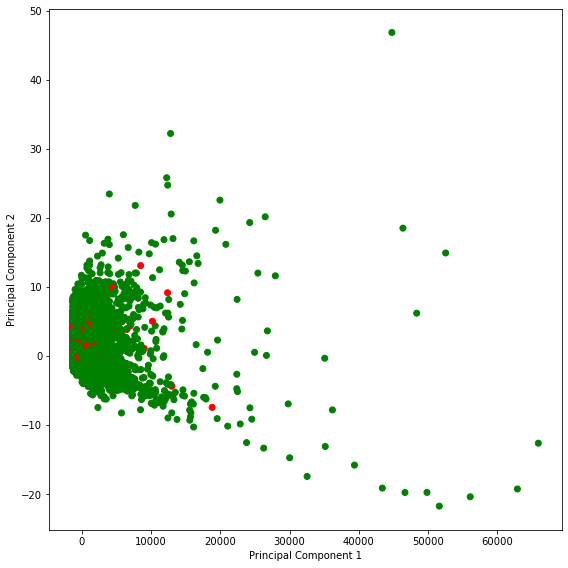

In [91]:
#plotting prinicipal component
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c = y_train.map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

### PCA Evaluation

In [92]:
#checking test data
X_test.head()

,last_day_rch_amt_6,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,last_day_rch_amt_7,last_day_rch_amt_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,total_rech_6,total_rech_7,total_rech_8,total_rech_6_7,roam_any_6,roam_any_7,roam_any_8,local_any_6,local_any_7,local_any_8,std_any_6,std_any_7,std_any_8,spl_any_6,spl_any_7,spl_any_8,data_used_6,data_used_7,data_used_8
58687,-0.705924,1.278436,-0.020708,0.663355,-0.686372,-0.651887,-0.591203,-0.061559,-0.000466,0.067269,-0.719321,-0.649323,-0.374649,-0.376277,-0.367440,-0.400139,-0.392977,-0.381438,-0.115307,-0.117408,-0.107487,-0.401945,-0.407222,-0.379971,-0.430253,-0.447052,-0.418406,-0.360406,-0.347769,-0.346061,-0.211237,-0.215590,-0.181471,-1.023780,-0.180633,-0.202272,-0.117045,1698.0,-0.532244,-0.460992,-0.471581,0.200049,0.190481,0.274977,0.409235,0.413303,0.47255,0.569787,0.413303,0.47255,0.616928,0.707499,0.625070
42336,1.053370,-0.669308,-0.423128,-0.586534,-0.776317,-0.722750,-0.606230,-0.350007,-0.419229,-0.202318,-0.719321,-0.398022,0.825700,1.075474,0.890738,0.953911,0.942753,1.025093,-0.115307,-0.117408,-0.107487,-0.401945,-0.407222,-0.379971,-0.029785,1.028972,-0.418406,1.322520,1.215596,1.316320,-0.211237,-0.215590,-0.181471,-0.787695,-0.212704,0.545351,-0.063288,2841.0,1.878837,-0.460992,-0.471581,0.200049,0.190481,0.274977,0.409235,0.413303,0.47255,0.569787,0.413303,0.47255,0.491354,0.379837,0.238815
7720,-0.496484,-0.443523,-0.152462,-0.268541,0.484070,0.105595,0.459952,0.676578,0.253980,0.323189,-0.502754,-0.439905,-0.374649,-0.376277,-0.367440,-0.400139,-0.392977,-0.381438,-0.115307,-0.117408,-0.107487,-0.401945,-0.407222,-0.379971,-0.430253,-0.447052,-0.418406,-0.360406,-0.347769,-0.346061,-0.211237,-0.215590,-0.181471,1.649750,-0.473361,-0.393261,-0.364084,965.0,-0.532244,-0.460992,-0.471581,0.200049,0.190481,0.274977,0.409235,0.413303,0.47255,-1.755040,0.413303,0.47255,-0.492076,-0.523052,-0.490202
20401,0.062022,-0.331147,-0.275013,-0.169820,-0.144361,-0.152951,0.171184,0.461367,0.266847,0.085649,0.074757,0.258152,-0.054620,0.369791,-0.367440,-0.400139,0.371934,-0.381438,-0.115307,-0.117408,-0.107487,-0.401945,-0.407222,-0.379971,2.373021,0.659966,1.174949,-0.360406,-0.347769,-0.346061,-0.211237,2.572612,-0.181471,-0.996499,0.324987,0.289023,-0.088052,3221.0,-0.532244,-0.460992,-0.471581,0.200049,0.190481,0.274977,0.409235,0.413303,0.47255,0.569787,0.413303,0.47255,-0.100555,-0.160316,-0.297620
44562,0.062022,0.910619,0.687429,0.535595,1.506740,0.854649,0.804766,1.926203,1.252862,0.509237,-0.481097,-0.300294,0.374480,0.314721,0.409738,0.378901,0.375523,0.427796,-0.115307,-0.117408,-0.107487,-0.401945,-0.407222,-0.379971,-0.430253,-0.447052,-0.418406,1.322520,1.215596,1.316320,-0.211237,-0.215590,-0.181471,-0.902065,0.068424,-0.028245,-0.001679,2340.0,-0.532244,-0.460992,-0.471581,0.200049,0.190481,0.274977,0.409235,0.413303,0.47255,0.569787,0.413303,0.47255,-0.129025,0.054276,-0.222474


In [93]:
#PCA on Test data
X_test_pca=pca.transform(X_test)
X_test_pca.shape

(6304, 15)

In [94]:
#checking y_test
y_test.head()

58687    0
42336    0
7720     0
20401    0
44562    0
Name: Churn, dtype: int64

In [95]:
# Making prediction on the test data
pred_prob_test = model.predict_proba(X_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_prob_test))

'1.0'

In [96]:
# Predicted test probabilities
y_test_pred = logsk.predict_proba(X_test_pca)
# Converting y_test_pred to a dataframe which is an array
y_test_pred_df = pd.DataFrame(y_test_pred)
# Converting to column dataframe
y_test_pred_df = y_test_pred_df.iloc[:,[1]]
# Let's see the head
y_test_pred_df.head()

,1
0,6.796265e-06
1,4.865689e-07
2,2.279644e-05
3,8.046439e-06
4,1.529007e-06


In [97]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()
# Putting 'I' to index
y_test_df['I'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_test_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_test_pred_df
y_test_pred_final = pd.concat([y_test_df,y_test_pred_df], axis=1)
# Renaming the column 
y_test_pred_final= y_test_pred_final.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
y_test_pred_final = y_test_pred_final.reindex(['I', 'Churn', 'Churn_Prob'], axis=1)
# Let's see the head of y_test_pred_final
y_test_pred_final.head()
# Creating new column 'Predicted' with 1 if Converted_Prob > 0.5 else 0
y_test_pred_final['Predicted'] = y_test_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.10 else 0)
# Let's see the head
y_test_pred_final.head()

,I,Churn,Churn_Prob,Predicted
0,58687,0,6.796265e-06,0
1,42336,0,4.865689e-07,0
2,7720,0,2.279644e-05,0
3,20401,0,8.046439e-06,0
4,44562,0,1.529007e-06,0


In [98]:
## Let's check the overall accuracy.
round(metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.Predicted), 4) * 100

98.75

In [99]:
confusion2 = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.Predicted )
confusion2

array([[5896,   75],
       [   4,  329]], dtype=int64)

In [100]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [101]:
# checking the recall of our logistic regression model
round(TP / float(TP+FN), 4) * 100

98.8

In [102]:
#checking precision
round(TP / float(TP+FP), 4) * 100

81.44

In [103]:
## Let's get precision
round(precision_score(y_test_pred_final.Churn, y_test_pred_final.Predicted), 4) * 100

81.44

### STEP 7: Model Building - Random forest

In [104]:
#import RandomForestClassifier
#fitting TRAIN data
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=5)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5)

In [105]:
predictions=rfc.predict(X_test)

In [106]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5971
           1       0.98      1.00      0.99       333

    accuracy                           1.00      6304
   macro avg       0.99      1.00      0.99      6304
weighted avg       1.00      1.00      1.00      6304



### Grid search to find optimal parameters 

In [107]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,12,16,20],
    'min_samples_leaf': range(10, 20, 30),
    'min_samples_split': range(10, 30, 50),
    'n_estimators': [5,10,15,20], 
    'max_features': [5, 10, 15]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [108]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 12, 16, 20],
                         'max_features': [5, 10, 15],
                         'min_samples_leaf': range(10, 20, 30),
                         'min_samples_split': range(10, 30, 50),
                         'n_estimators': [5, 10, 15, 20]},
             verbose=1)

In [109]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9990482017812224 using {'max_depth': 4, 'max_features': 15, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 10}


### Fitting the best model

In [110]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=12,
                             min_samples_leaf=10, 
                             min_samples_split=10,
                             max_features=10,
                             n_estimators=10)

In [111]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=12, max_features=10, min_samples_leaf=10,
                       min_samples_split=10, n_estimators=10)

In [112]:
# predict
predictions = rfc.predict(X_test)

In [113]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5971
           1       0.98      0.99      0.99       333

    accuracy                           1.00      6304
   macro avg       0.99      0.99      0.99      6304
weighted avg       1.00      1.00      1.00      6304



### STEP 8: PREDICTION ON TEST DATA

In [114]:
#IMPORTING Test dataset
telecom_test=pd.read_csv('test.csv')
telecom_test.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [115]:
#Dropping unwanted columns
telecom_test = telecom_test.drop(columns=['offnet_mou_8','total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8','count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8'], axis=1)

In [116]:
#dropping unwanted columns
telecom_test = telecom_test.drop(columns=['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8','loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8','std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8','isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8',  'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8','vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g','max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8','total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8'])

In [117]:
#dropping unwanted columns
telecom_test=telecom_test.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'],axis=1)

In [118]:
#filling NaN values
telecom_test=telecom_test.fillna(0)

In [119]:
#Checking info of the test dataframe
telecom_test.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  30000 non-null  int64  
 1   circle_id           30000 non-null  int64  
 2   loc_og_t2o_mou      30000 non-null  float64
 3   std_og_t2o_mou      30000 non-null  float64
 4   loc_ic_t2o_mou      30000 non-null  float64
 5   arpu_6              30000 non-null  float64
 6   arpu_7              30000 non-null  float64
 7   arpu_8              30000 non-null  float64
 8   onnet_mou_6         30000 non-null  float64
 9   onnet_mou_7         30000 non-null  float64
 10  onnet_mou_8         30000 non-null  float64
 11  offnet_mou_6        30000 non-null  float64
 12  offnet_mou_7        30000 non-null  float64
 13  std_og_t2c_mou_6    30000 non-null  float64
 14  std_og_t2c_mou_7    30000 non-null  float64
 15  std_og_t2c_mou_8    30000 non-null  float64
 16  tota

In [120]:
#Fitting model
model = RandomForestClassifier()
model.fit(X,y)

RandomForestClassifier()

In [121]:
#predicting on test dataset
pred=model.predict(telecom_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [122]:
#creating 'submission' dataframe
submission=pd.DataFrame()
submission['id']=telecom_test['id']
submission['churn_probability']=pred
submission.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [123]:
#Saving the dataframe to .csv file
submission.to_csv('Submission.csv', index=False)

## CONCLUSION

### We notice that the following 5 factors affect the churn rate considerably -
1) Total Incoming Minutes of usage in the August

2) Total Incoming Minutes of usage in the July

3) 2G data pack

4) Roaming

5) Sachet 2g

Also these metrics are inversely proportion to churn which means that we need to come up with campaigns that would keep people engaged either via calls (incoming) or on internet. One interesting thing to note here is that we see that a lot of people are hooked on 2G and hence are not churning. It presents us with a great opportunity that if shift these people from 2g to 3g then we have a greater chance of these people not churning. Hence discounts on 3G pack can be one of the popular maarketing campaigns